<a href="https://colab.research.google.com/github/BagusDAriAwan/creditcard-fraud/blob/master/UCSD_kmeans_iForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import matplotlib.pyplot as plt
import seaborn as sb; sns.set()
import math
import collections
import time
# from scipy import stats

In [0]:
# %matplotlib inline
# from IPython.display import display
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from statistics import stdev

from sklearn import tree

from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

In [0]:
# np.random.seed(1)

In [0]:
def confussion_matrik(actual,predict):
    TP,FP,FN,TN = 0,0,0,0
    for i,val in enumerate(actual):
        if val == 0:
            if val == predict[i]:
                TN += 1
            else:
                FP += 1
        if val == 1:
            if val == predict[i]:
                TP += 1
            else:
                FN += 1
    return TP,FP,FN,TN
 
def acc_sens_spec(actual,predict):
    TP,FP,FN,TN = confussion_matrik(actual,predict)
# akurasi
    if (TP+FP+FN+TN) == 0 :
        accuracy = 0 
    else :
        accuracy = (TP+TN)/(TP+FP+FN+TN)
        
# sensitivity
    if (TP+FN) == 0 :
        sensitivity = 0
    else :
        sensitivity = TP/(TP+FN)
        
# specifity    
    if (TN +FP) == 0 :
        specifity = 0
    else :
        specifity = TN/(TN +FP)
        
# precision
    if (TP+FP) == 0 :
        precision = 0
    else :
        precision = TP/(TP+FP)

# recall
    recall = sensitivity

# f1_score
    if (precision+recall) == 0 :
        f1_score = 0
    else :
        f1_score = 2*((precision*recall)/(precision+recall))  
    
    return accuracy,sensitivity,specifity,precision,recall,f1_score


In [0]:
# confussion_matrik(y,pred)

In [0]:
# accuracy,sensitivity,specifity = acc_sens_spec(y,pred)
# print('acc',accuracy)
# print('sens',sensitivity)
# print('spec',specifity)

In [0]:
# accuracy_metric(y,RF.predict(X))

In [0]:
from sklearn.decomposition import PCA
import pylab as pl
def plot_this(X_rs,y_rs,method):
  # Use principal component to condense the 10 features to 2 features
  pca = PCA(n_components=2).fit(X_rs)
  pca_2d = pca.transform(X_rs)
  # Assign colors
  for i in range(0, pca_2d.shape[0]):
    if y_rs[i] == 0:
      c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
    elif y_rs[i] == 1:
      c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='*')  
  pl.legend([c1, c2], ['Class 1', 'Class 2'])
  pl.title(method)
  pl.axis([-4, 5, -4, 4])  # x axis (-4,5), y axis (-4,4)
  pl.show()
    


## ---------

In [0]:
df=pd.read_csv("drive/My Drive/Colab Notebooks/UCSD/ucsdInputs.csv")
df['Class']=pd.read_csv("drive/My Drive/Colab Notebooks/UCSD/ucsdTargets.csv", header = None)

In [325]:
df.head()

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,Class
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,12.95,-723,19,0,0,0,0,0,1,0
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,5497,14,1,0,0,1,0,1,0
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-4420,23,0,0,1,1,0,1,0
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,5010,31,0,0,1,0,0,1,0
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-4074,21,0,0,1,0,0,1,0


In [326]:
df.tail()

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,Class
99995,31.08,14,GA,313,1234567890197181,2,owdybxinfiqla@ucxhcpouwmc.net,0,14,1,31.08,-8044,10,0,0,0,0,0,1,0
99996,49.95,14,LA,704,1234567890197182,0,vnmhghmwnxhso@xnzysnub.com,0,14,0,49.95,393,18,1,0,1,0,0,1,0
99997,11.01,14,NY,117,1234567890196488,3,uphjcxjkubtrw@aol.com,1,14,1,11.01,4261,11,0,0,1,1,0,1,0
99998,12.95,14,VA,245,1234567890197183,3,sasmynlsqebdv65@aol.com,1,14,0,12.95,515,21,0,0,0,0,0,1,0
99999,12.95,14,TN,372,1234567890197184,3,kvclngihgwldo@yahoo.com,1,14,0,12.95,4229,22,0,0,0,1,0,1,0


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
amount        100000 non-null float64
hour1         100000 non-null int64
state1        99999 non-null object
zip1          100000 non-null int64
custAttr1     100000 non-null int64
field1        100000 non-null int64
custAttr2     100000 non-null object
field2        100000 non-null int64
hour2         100000 non-null int64
flag1         100000 non-null int64
total         100000 non-null float64
field3        100000 non-null int64
field4        100000 non-null int64
indicator1    100000 non-null int64
indicator2    100000 non-null int64
flag2         100000 non-null int64
flag3         100000 non-null int64
flag4         100000 non-null int64
flag5         100000 non-null int64
Class         100000 non-null int64
dtypes: float64(2), int64(16), object(2)
memory usage: 15.3+ MB


In [328]:
df.shape

(100000, 20)

In [329]:
df['Class'].value_counts()

0    97346
1     2654
Name: Class, dtype: int64

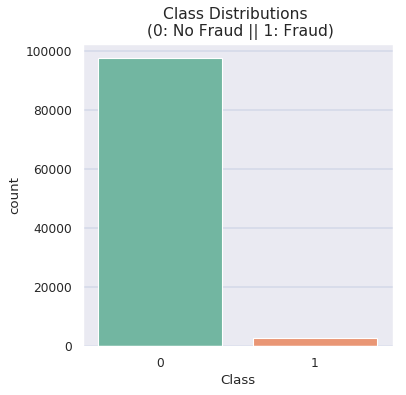

In [330]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sns.countplot('Class', data=df,palette='Set2')


In [331]:
count = 0
for a in df.columns:
    if df[a].isnull().sum() > 0 :
        print(a)
        count+=1
count

state1


1

In [332]:
df['state1'].unique()

array(['WA', 'KY', 'CA', 'GA', 'AZ', 'MO', 'TX', 'IL', 'HI', 'UT', 'NC',
       'NY', 'FL', 'MN', 'VA', 'MA', 'IN', 'LA', 'TN', 'MD', 'NJ', 'ID',
       'OH', 'PA', 'SC', 'AL', 'MI', 'WI', 'DC', 'AR', 'CT', 'OR', 'OK',
       'SD', 'NH', 'NM', 'NV', 'NE', 'MS', 'ND', 'CO', 'KS', 'WV', 'RI',
       'ME', 'IA', 'MT', 'WY', 'AK', 'VT', 'DE', 'AP', 'AE', 'PR', nan],
      dtype=object)

In [0]:
df['state1'] =df['state1'].fillna('CA')

In [334]:
df.iloc[80876:80877]

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,Class
80876,49.95,20,CA,9,1234567890183719,3,womaeenhfvtfu@hotmail.com,0,20,0,49.95,3166,23,1,0,1,0,0,1,0


In [335]:
len(df.columns)

20

3.2. Data Preprocessing
The hard version of the dataset contains two sub datasets—training set and testing set. The training set is labeled and the testing set is unlabeled. We have used only the labeled training dataset. It contains 100000 transactions of 73729 customers spanning over a period of 98 days. The dataset contains 20 fields including class labels—amount, hour1, state1, zip1, custAttr1, field1, custAttr2, field2, hour2, flag1, total, field3, field4, indicator1, indicator2, flag2, flag3, flag4, flag5, and Class. It is found that custAttr1 is the account/card number and custAttr2 is e-mail id of the customer. Both these fields are unique to a particular customer and thus we decided to keep only custAttr1. The fields total and amount as well as hour1 and hour2 are found to be the same for each customer and thus we removed total and hour2. Similarly state1 and zip1 are also found to be representing the same information and thus we removed state1. All other fields are anonymized and therefore we decided to keep them as they are. Thus our final dataset contains 16 fields—amount, hour1, zip1, custAttr1, field1, field2, flag1, field3, field4, indicator1, indicator2, flag2, flag3, flag4, flag5, and Class.

In [336]:
df.tail(40)

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,Class
99960,12.95,14,NJ,88,1234567890197156,3,rwvyhwlipxnnv53@sprintpcs.com,0,14,0,12.95,4706,20,0,0,1,1,0,1,0
99961,38.85,14,GA,302,1234567890197157,2,ezvplbxxtjcsz@excite.com,1,14,1,38.85,5182,10,0,0,1,1,0,1,0
99962,49.95,14,CA,917,1234567890197158,3,zbkgunjizlgil@lpgdonqmblt.com,0,14,1,49.95,1056,24,0,0,1,1,0,1,0
99963,12.95,14,MI,492,1234567890148109,2,jcsjrwobjzlae@merillat.com,1,14,1,12.95,766,6,0,0,1,1,0,1,0
99964,12.95,14,NC,281,1234567890197140,0,winifxssqelvx007@hotmail.com,1,14,0,12.95,2246,23,0,0,1,0,0,1,0
99965,38.85,14,FL,330,1234567890197159,2,ngdlabnefkequ@aol.com,1,14,0,38.85,-908,18,0,0,1,1,0,1,0
99966,38.85,14,TX,760,1234567890197160,3,xprrqlyhdwumy@msn.com,0,14,1,38.85,-342,8,0,0,0,0,0,1,0
99967,31.08,14,AL,366,1234567890197161,3,ziwpwvejfcvig.@boeing.com,1,14,1,31.08,4177,6,0,0,1,1,0,2,0
99968,0.00,14,LA,708,1234567890197162,4,zsxbringavcae@cbbtr.com,0,14,1,0.00,-2758,13,0,0,0,0,0,1434,0
99969,38.85,14,CA,927,1234567890197163,3,hkcedavtrxdcf@yahoo.com,0,14,1,38.85,3965,8,0,0,1,0,0,2,0


In [0]:
df = df.drop(['custAttr2','total','hour2','state1',], axis=1)

In [338]:
len(df.columns)

16

3.3. Training and Testing Dataset Creation
The following procedures are used for creating training and testing datasets for evaluating our model.

First, we removed the transactions corresponding to those customers who have only one transaction in dataset since it appears either in training or testing dataset only. Now the dataset has been reduced to 40918 transactions.

Then we divided these 40918 transactions into two sets—training set with 21000 transactions and testing set with 19918 transactions.

Again from the training dataset we removed the transactions corresponding to those customers who have only one transaction in the training dataset since it is hard to find a pattern from a single transaction. Now the training dataset has been reduced to 19165 transactions.

From this dataset, we have randomly selected different groups of customers and their corresponding transactions in the training and testing dataset to create different training and testing datasets to evaluate the performance of FraudMiner with increasing number of transactions. The data distribution is shown in Table 1.

In [0]:
# df['frek'] = df.groupby('custAttr1')['custAttr1'].transform('count')
# df['frek'].value_counts()

In [340]:
df.shape

(100000, 16)

In [0]:
# df = df[df['frek'] > 1]
# df.shape

In [0]:
# df.tail()

In [0]:
# df = df.reset_index(drop=True)
# df.tail()

In [344]:
df['Class'].value_counts()

0    97346
1     2654
Name: Class, dtype: int64

In [0]:
# df = df.drop(['custAttr1'], axis=1)
# df = df.drop(['frek'], axis=1)

In [0]:
X = df.drop('Class', axis=1)
y = df['Class'].copy()

In [347]:
y.value_counts()

0    97346
1     2654
Name: Class, dtype: int64

In [348]:
X.columns

Index(['amount', 'hour1', 'zip1', 'custAttr1', 'field1', 'field2', 'flag1',
       'field3', 'field4', 'indicator1', 'indicator2', 'flag2', 'flag3',
       'flag4', 'flag5'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11111, random_state=1, stratify=y_train)


In [351]:
X_train.head()

,amount,hour1,zip1,custAttr1,field1,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5
90035,49.95,19,70,1234567890190393,2,0,1,1259,17,0,0,1,0,0,1
28169,0.00,12,379,1234567890145743,4,1,0,3039,11,0,0,1,1,0,1600
53132,12.95,11,486,1234567890164040,3,1,1,6268,12,0,0,0,0,0,2
16605,38.85,14,833,1234567890136938,3,0,0,-6839,20,0,0,0,0,0,1
95648,31.08,17,973,1234567890194260,2,0,0,-6940,23,0,0,1,0,0,1


In [0]:
def convert(y):
    for i in range(y.shape[0]):
        if y[i]==-1:
            y[i]=1;
        else:
            y[i]=0
    return y

In [0]:
from sklearn.ensemble import IsolationForest
def iForest(X, ntree, sample, th):
    ifor = IsolationForest(n_estimators=ntree, max_samples=sample, contamination=th, random_state=1)
#     ifor = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.0039, max_features=1.0, random_state=42, verbose=0)
    ifor.fit(X)
    return ifor

In [0]:
def model_evaluate(ifor,X,y):
    ts = time.time()
    y_pred=ifor.predict(X)
    tf = time.time()
    print('time : ', tf-ts)
    y_pred=convert(y_pred)
    
    accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y,y_pred)
    print('accuracy : ',accuracy)
    print('sensitivity : ',sensitivity)
    print('specifity : ', specifity)
    print('precision : ',precision)
    print('recall : ',recall)
    print('f1 score : ',f1_score)
    print('Confusion matrix')
    TP,FP,FN,TN = confussion_matrik(y,y_pred)
    print('TP = ',TP,'FP = ',FP,'FN = ',FN,'TN = ',TN)
    df_cm = pd.DataFrame([[TN,FP],[FN,TP]],
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
    plt.figure(figsize = (8,4))
    sb.set(font_scale=1.4)#for label size
    sb.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

In [0]:
def eval_model(ifor,X,y):
#     ts = time.time()
    y_pred=ifor.predict(X)
#     tf = time.time()
    y_pred=convert(y_pred)
    accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y,y_pred)
    return accuracy,sensitivity,specifity,precision,recall,f1_score

In [0]:
y_test1 = np.array(y_test)
y_train1=np.array(y_train)
y_val1 = np.array(y_val)

In [357]:
print(len(X_train),len(X_val),len(X_test))

80000 10000 10000


In [358]:
ytrain_ab = y_train[y_train==1]
yval_ab = y_val[y_val==1]
ytest_ab = y_test[y_test==1]
print('fraud train =',len(ytrain_ab),'fraud val =',len(yval_ab),'fraud test =',len(ytest_ab))

fraud train = 2124 fraud val = 265 fraud test = 265


In [359]:
th_train=len(ytrain_ab)/len(y_train)
th_test=len(ytest_ab)/len(y_test)
th_val=len(yval_ab)/len(y_val)
print('threshold train =',th_train, 'threshold test =', th_test,'threshold val =', th_val)

threshold train = 0.02655 threshold test = 0.0265 threshold val = 0.0265


In [360]:
nTree= 100
sample = 256
ifo1 = iForest(X_train, nTree, sample, th_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.44348812103271484
accuracy :  0.9584
sensitivity :  0.25660377358490566
specifity :  0.9775038520801232
precision :  0.23693379790940766
recall :  0.25660377358490566
f1 score :  0.2463768115942029
Confusion matrix
TP =  68 FP =  219 FN =  197 TN =  9516


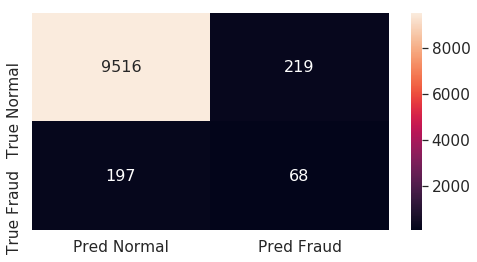

In [361]:
model_evaluate(ifo1,X_val,y_val1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.4629042148590088
accuracy :  0.9593
sensitivity :  0.22264150943396227
specifity :  0.9793528505392912
precision :  0.22692307692307692
recall :  0.22264150943396227
f1 score :  0.22476190476190475
Confusion matrix
TP =  59 FP =  201 FN =  206 TN =  9534


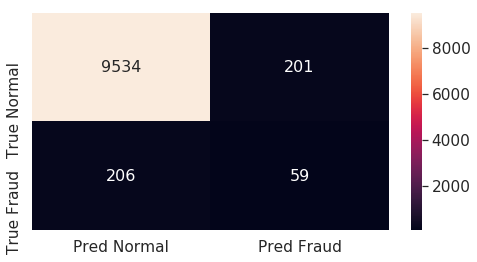

In [362]:
model_evaluate(ifo1, X_test, y_test1)

In [0]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans
scaler = MinMaxScaler()

In [0]:
kmeans_data = scaler.fit_transform(X_train)
pca=PCA(n_components=2).fit(kmeans_data)
pca2dkmeans = pca.transform(kmeans_data)

In [0]:
kmeans_cc = KMeans(n_clusters=2, random_state=1).fit(kmeans_data)

In [0]:
X_kmeans = X_train.copy()
X_kmeans['cluster'] = kmeans_cc.labels_

ytrain_km = y_train.copy()
ytrain_km['cluster'] = kmeans_cc.labels_

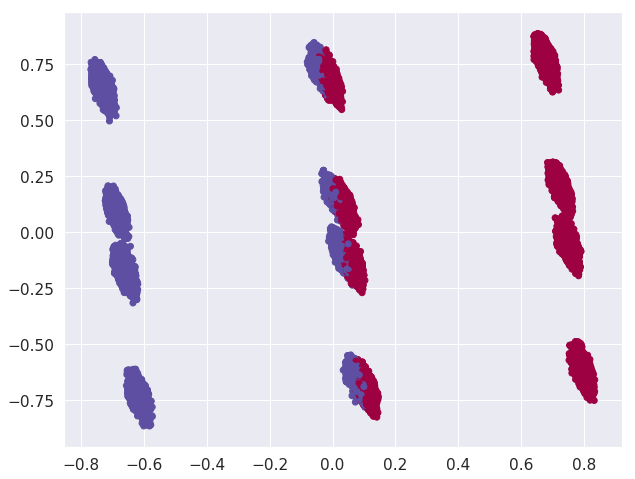

In [367]:
plt.figure(figsize=(10, 8))
plt.scatter(pca2dkmeans[:,0], pca2dkmeans[:,1], c=X_kmeans['cluster'], cmap='Spectral')

In [0]:
clust1 = X_kmeans.loc[X_kmeans['cluster']==0]
y1 = ytrain_km.loc[ytrain_km['cluster']==0]
# y_c1 = y1.drop(['cluster'], axis=1)
clus1=clust1.drop(['cluster'], axis=1)

clust2 = X_kmeans.loc[X_kmeans['cluster']==1]
y2 = ytrain_km.loc[ytrain_km['cluster']==1]
# y_c2 = y2.drop(['cluster'], axis=1)
clus2=clust2.drop(['cluster'], axis=1)

## Cluster 1

In [369]:
len(clus1)

44523

In [370]:
aby1_train = y1.loc[y1==1]
print('ab train=',len(aby1_train))

ab train= 1010


In [371]:
th1_train= len(aby1_train)/len(y1)
# th1_test= len(aby1_test)/len(X1_test)
print('th train=',th1_train)

th train= 0.02268490443141747


In [372]:
ifoc1 = iForest(clus1, nTree, sample, th_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.43187975883483887
accuracy :  0.9598
sensitivity :  0.26037735849056604
specifity :  0.978839239856189
precision :  0.2509090909090909
recall :  0.26037735849056604
f1 score :  0.25555555555555554
Confusion matrix
TP =  69 FP =  206 FN =  196 TN =  9529


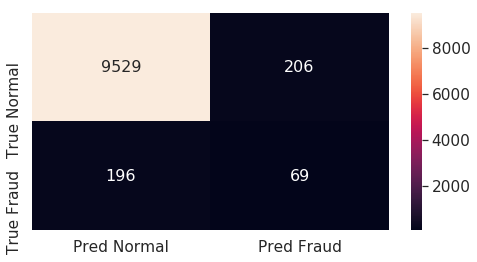

In [373]:
model_evaluate(ifoc1, X_val, y_val1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.43019628524780273
accuracy :  0.9575
sensitivity :  0.21509433962264152
specifity :  0.9777092963533641
precision :  0.20802919708029197
recall :  0.21509433962264152
f1 score :  0.21150278293135438
Confusion matrix
TP =  57 FP =  217 FN =  208 TN =  9518


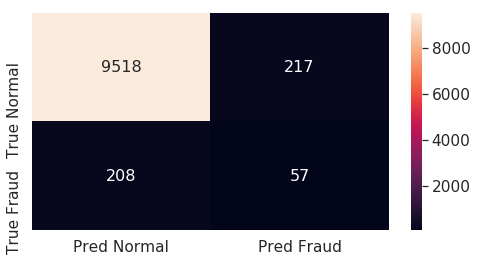

In [374]:
model_evaluate(ifoc1, X_test, y_test1)

## Cluster 2

In [375]:
len(clus2)

35477

In [376]:
aby2_train = y2.loc[y2==1]
# aby2_test = y2_test[y2_test==1]
print('ab train=',len(aby2_train))

ab train= 1114


In [377]:
th2_train= len(aby2_train)/len(clus2)
# th2_test= len(aby2_test)/len(X2_test)
print('th train=',th2_train)

th train= 0.03140062575753305


In [378]:
ifoc2 = iForest(clus2,nTree,sample,th_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.43332481384277344
accuracy :  0.9298
sensitivity :  0.3132075471698113
specifity :  0.9465844889573704
precision :  0.13764510779436154
recall :  0.3132075471698113
f1 score :  0.19124423963133644
Confusion matrix
TP =  83 FP =  520 FN =  182 TN =  9215


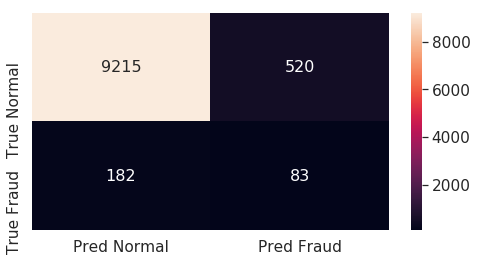

In [379]:
model_evaluate(ifoc2, X_val, y_val1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  0.4327869415283203
accuracy :  0.9282
sensitivity :  0.2981132075471698
specifity :  0.945351823317925
precision :  0.12929623567921442
recall :  0.2981132075471698
f1 score :  0.18036529680365299
Confusion matrix
TP =  79 FP =  532 FN =  186 TN =  9203


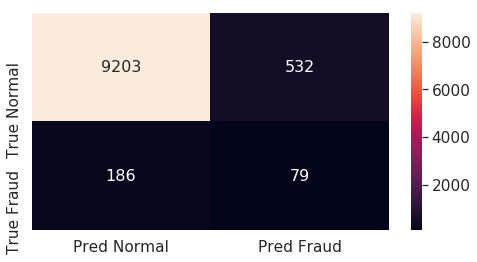

In [380]:
model_evaluate(ifoc2, X_test, y_test)